# Correlation

Correlation between an event on DEB1, and all the other parameter

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3
from interval import Interval
from observation import Observation
from constants import *
from datetime import timedelta
from tools import sequence_to_interval
plt.style.use('ggplot')
mpld3.enable_notebook()

reactor_site = "B1" #[site+tranche for site in ["A","B","C","D","E","F","G","H"] for tranche in ["1","2"]] + ["B3","B4","F3","F4"]

suffixes = [
"DEB1-1","DEB1-2","DEB1-3","DEB1-4", # Débit de fuite au joint 1 (Gamme Large)
"DEB2-1","DEB2-2","DEB2-3","DEB2-4", # Débit de fuite au joint 1 (Gamme Étroite)
"DEB3-1","DEB3-2","DEB3-3","DEB3-4","DEB3-5", # Débit d'injection au joint
"PUI-",  # Puissance thermique moyenne
"PRE-",  # Pression
"TEM1-", # Température ligne d'injection aux joints (en * Celsius) ### A rapprocher de DEB3
"TEM2-", # Température fuites joint 1
"TEM3-1","TEM3-2","TEM3-3","TEM3-4",# Température eau joint 1 - 051PO ### A rapprocher de DEB1 DEB2
"VIT-1","VIT-2","VIT-3","VIT-4"# Vitesse de rotation
] 

PATH = "../../Data/GMPP_IRSDI/"
obs = Observation(PATH,reactor_site,suffixes,verbose=1,ignore_keys=deb2)

print(str(len(obs.df))+" : Initial length of full df")
print(str(len(obs.full_concatenated_df))+" : New length of all selected intervals")

Loading in memory 25 observations...
Concatenation...
Changing isolated wrong values...
Forward Filling...
Backward Filling...
525887 : Initial length of full df
504474 : New length of all selected intervals


In [11]:
from rule import *
from scale import *
from interaction import Interaction
full_deb1_df = obs.full_concatenated_df[deb1[0]].to_frame(deb1[0])
it = Interaction(full_deb1_df, obs.low_regime_intervals,3)

icr_t = IncreasingTrend() # IncreasingTrend(threshold=0.5) with sc_day_3
sc_day_1 = DayScale(1)
sc_day_3 = DayScale(3)
sc_day_5 = DayScale(5)

it.add_rule("icr_t_1",icr_t,sc_day_1)


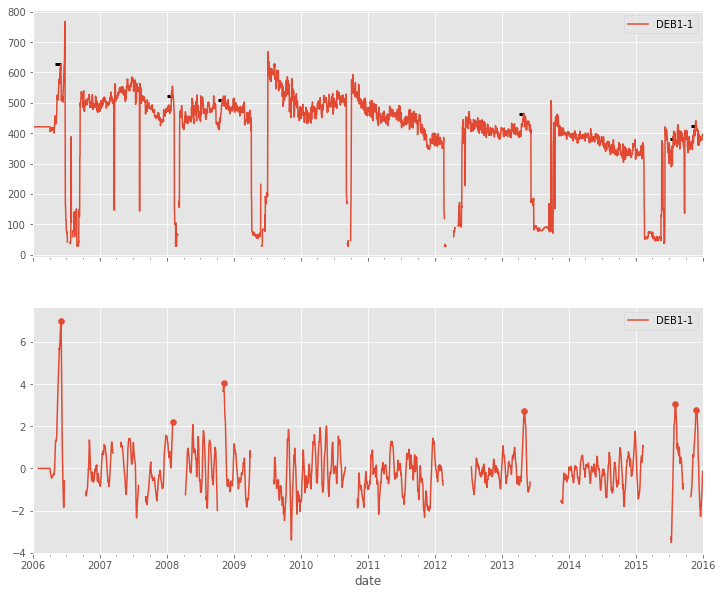

In [12]:
it.visualize_rule("icr_t_1")

In [13]:
from widget import Widget
icr_t_1 = it.get_intervals("icr_t_1",sc_day_1)
Widget(obs.full_concatenated_df).intervals(icr_t_1)

## Correlation using pandas package

- pearson : standard correlation coefficient
- kendall : Kendall Tau correlation coefficient
- spearman : Spearman rank correlation

Series.corr(other, method=’pearson’, min_periods=None)

DEB1-1    1.000000
DEB1-2    0.943870
DEB1-3    0.955195
DEB1-4    0.967328
DEB2-1    0.968324
DEB2-2    0.951466
DEB2-3    0.890431
DEB2-4    0.246169
DEB3-1   -0.004911
DEB3-2   -0.329248
DEB3-3    0.069586
DEB3-4   -0.118638
DEB3-5   -0.118499
PUI-     -0.092494
PRE-     -0.236818
TEM1-    -0.771053
TEM2-    -0.148413
TEM3-1   -0.679222
TEM3-2   -0.755504
TEM3-3   -0.764713
TEM3-4   -0.757004
VIT-1    -0.077751
VIT-2    -0.013396
VIT-3    -0.060645
VIT-4    -0.060238
dtype: float64
date
2008-10-07 00:00:00    412.000000
2008-10-07 00:10:00    407.000000
2008-10-07 00:20:00    412.500000
2008-10-07 00:30:00    407.250000
2008-10-07 00:40:00    409.000000
2008-10-07 00:50:00    412.000000
2008-10-07 01:00:00    403.000000
2008-10-07 01:10:00    407.000000
2008-10-07 01:20:00    417.000000
2008-10-07 01:30:00    417.500000
2008-10-07 01:40:00    418.750000
2008-10-07 01:50:00    419.000000
2008-10-07 02:00:00    436.000000
2008-10-07 02:10:00    444.625000
2008-10-07 02:20:00    439.75

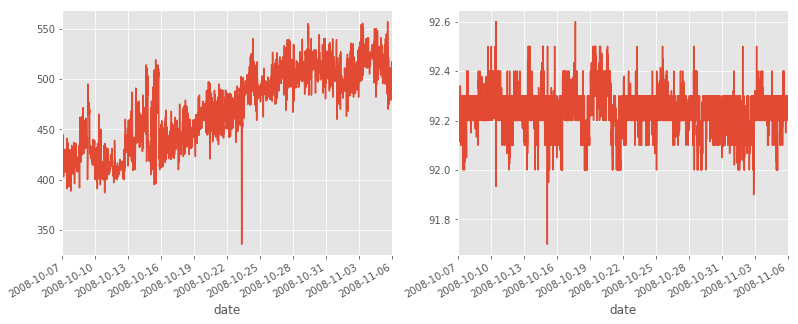

In [105]:
#print(icr_t_1[1])
#print(icr_t_1[1][0])
#df1 = obs.full_concatenated_df['date'] > icr_t_1[1][0] & obs.full_concatenated_df['date'] < icr_t_1[1][1] 

df1 = obs.full_concatenated_df[icr_t_1[1][0]:icr_t_1[1][1]]
#print(df1)
#cor1 = df1.corr(method='pearson')
#print(cor1)
#print(df1.columns[0:])
#print(df1[[deb1[0]]])

def correlate(data, target):
    data.apply(lambda x: x.corrwith(data[deb1[0]]))

print(df1.corrwith(df1[deb1[0]]))

print(df1['DEB1-1'])
   
name1 = ['DEB1-1']
name2 = ['PUI-']
name = ["PUI-",
"PRE-",
"TEM1-",
"TEM2-",
"TEM3-1",
"VIT-1",] 
    
def plot_param(data, interval,colname):
    new_data = data[interval[0]:interval[1]]
    for i in range(len(colname)):
        toPrint = new_data[colname[i]]
        toPrint.plot(figsize=(10,5))
        
fig, axs = plt.subplots(1,2)        
ax1 = df1['DEB1-1'].plot(ax=axs[0],figsize=(13,5))
ax2 = df1['PUI-'].plot(ax=axs[1],figsize=(13,5))

#plot_param(obs.full_concatenated_df, icr_t_1[1], name1)    
#plot_param(obs.full_concatenated_df, icr_t_1[1], name2)
    
#print(correlate(df1,0,'pearson'))

#print(obs.full_concatenated_df[deb1[0]][icr_t_1[1][0]:icr_t_1[1][1]])


## Correlation using pattern matching

In [ ]:
def get_explained_anomailes(data, intervals):
    for i in range(len(intervals)):
        